# Cross-Validation

La **Cross-Validation** (validazione incrociata) è una tecnica utilizzata in statistica e machine learning per valutare le performance di un modello di previsione. Invece di utilizzare un singolo set di dati di test, la cross-validation suddivide il dataset in più parti per ottenere una valutazione più robusta e affidabile delle prestazioni del modello. Ecco come funziona in modo generale:

1. **Divisione del Dataset**: Il dataset viene suddiviso in kkk sottoinsiemi (chiamati fold), solitamente di dimensioni uguali.
2. **Addestramento e Test**: Il modello viene addestrato su k−1k-1k−1 fold e testato sul fold rimanente. Questo processo viene ripetuto kkk volte, cambiando ogni volta il fold di test.
3. **Calcolo delle Metriche**: Durante ogni iterazione, si calcolano le metriche di performance del modello (ad es. accuratezza, precisione, recall, ecc.) sul fold di test.
4. **Media delle Metriche**: Alla fine delle kkk iterazioni, si calcola la media delle metriche di performance ottenute. Questo valore rappresenta una stima più affidabile delle prestazioni del modello rispetto a un'unica suddivisione in train e test.

**Esempi di Cross-Validation:**

- **k-Fold Cross-Validation**: Il dataset è diviso in k fold. Ogni fold viene utilizzato come set di test una volta e come set di addestramento k−1 volte.
    
    kk
    
    k−1k-1
    
- **Leave-One-Out Cross-Validation (LOOCV)**: Un caso particolare di k-Fold Cross-Validation dove k è uguale al numero totale di osservazioni nel dataset. Ogni osservazione viene utilizzata come set di test una volta.
    
    kk
    

**Vantaggi della Cross-Validation:**

- Riduce la variabilità della stima delle prestazioni del modello.
- Utilizza più dati per l'addestramento e il test, migliorando la generalizzazione del modello.

**Svantaggi della Cross-Validation:**

- Può essere computazionalmente costosa, soprattutto per grandi dataset o modelli complessi.

In sintesi, la cross-validation è una tecnica potente per valutare e migliorare le performance dei modelli di machine learning, assicurandosi che siano ben generalizzati e non solo adattati ai dati di addestramento.

## Suddivisione in modo semplice

In [27]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


# Carica il DataFrame
# Carica il dataset Iris
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='species')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape}, Validation set: {X_val.shape}, Test set: {X_test.shape}")

Training set: (96, 4), Validation set: (24, 4), Test set: (30, 4)


## Suddivisione avanzata

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Carica il dataset Iris
data = load_iris()
X = data.data
y = data.target

# Crea un classificatore Decision Tree
tree = DecisionTreeClassifier()

# Esegui la Cross-Validation
# Utilizziamo 5 fold per la cross-validation
scores = cross_val_score(tree, X, y, cv=5)

# Mostra i risultati
print("Accuratezza per ogni fold:", scores)
print("Accuratezza media:", np.mean(scores))
print("Deviazione standard dell'accuratezza:", np.std(scores))

Accuratezza per ogni fold: [0.96666667 0.96666667 0.9        1.         1.        ]
Accuratezza media: 0.9666666666666668
Deviazione standard dell'accuratezza: 0.036514837167011066


Accuratezza per ogni fold: [0.96666667 0.96666667 0.9        0.93333333 1.        ]
Accuratezza media: 0.9533333333333334
Deviazione standard dell'accuratezza: 0.03399346342395189


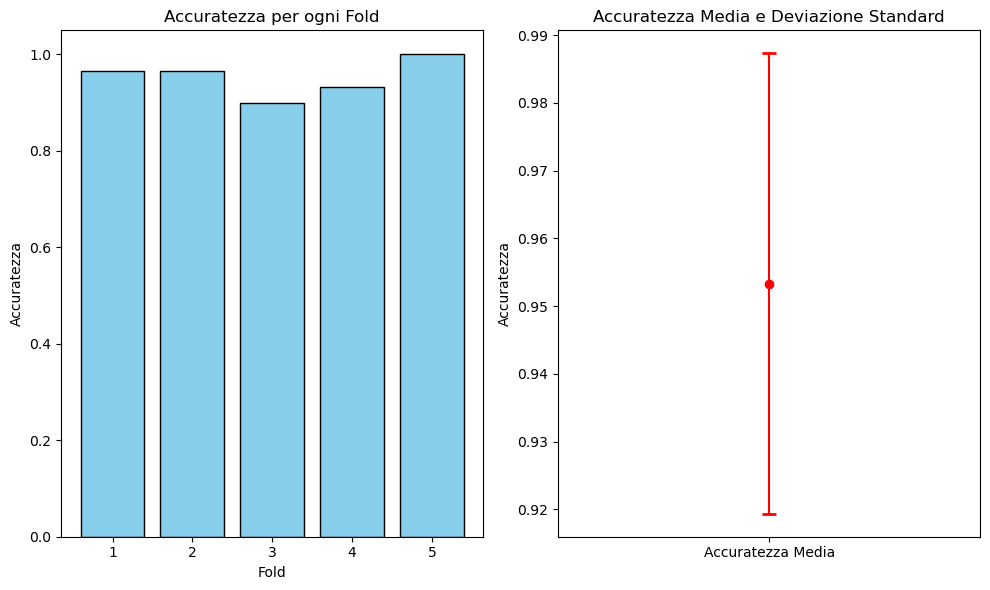

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Carica il dataset Iris
data = load_iris()
X = data.data
y = data.target

# Crea un classificatore Decision Tree
tree = DecisionTreeClassifier(random_state=100)

# Esegui la Cross-Validation
# Utilizziamo 5 fold per la cross-validation
scores = cross_val_score(tree, X, y, cv=5)

# Calcola le metriche
mean_score = np.mean(scores)
std_score = np.std(scores)

# Mostra i risultati
print("Accuratezza per ogni fold:", scores)
print("Accuratezza media:", mean_score)
print("Deviazione standard dell'accuratezza:", std_score)

# Crea il grafico
plt.figure(figsize=(10, 6))

# Grafico a barre delle accuratezze per ogni fold
plt.subplot(1, 2, 1)
plt.bar(range(1, len(scores) + 1), scores, color='skyblue', edgecolor='black')
plt.xlabel('Fold')
plt.ylabel('Accuratezza')
plt.title('Accuratezza per ogni Fold')

# Grafico a dispersione dell'accuratezza media e deviazione standard
plt.subplot(1, 2, 2)
plt.errorbar(x=1, y=mean_score, yerr=std_score, fmt='o', color='red', 
             capsize=5, capthick=2)
plt.xticks([1], ['Accuratezza Media'])
plt.ylabel('Accuratezza')
plt.title('Accuratezza Media e Deviazione Standard')

plt.tight_layout()
plt.show()

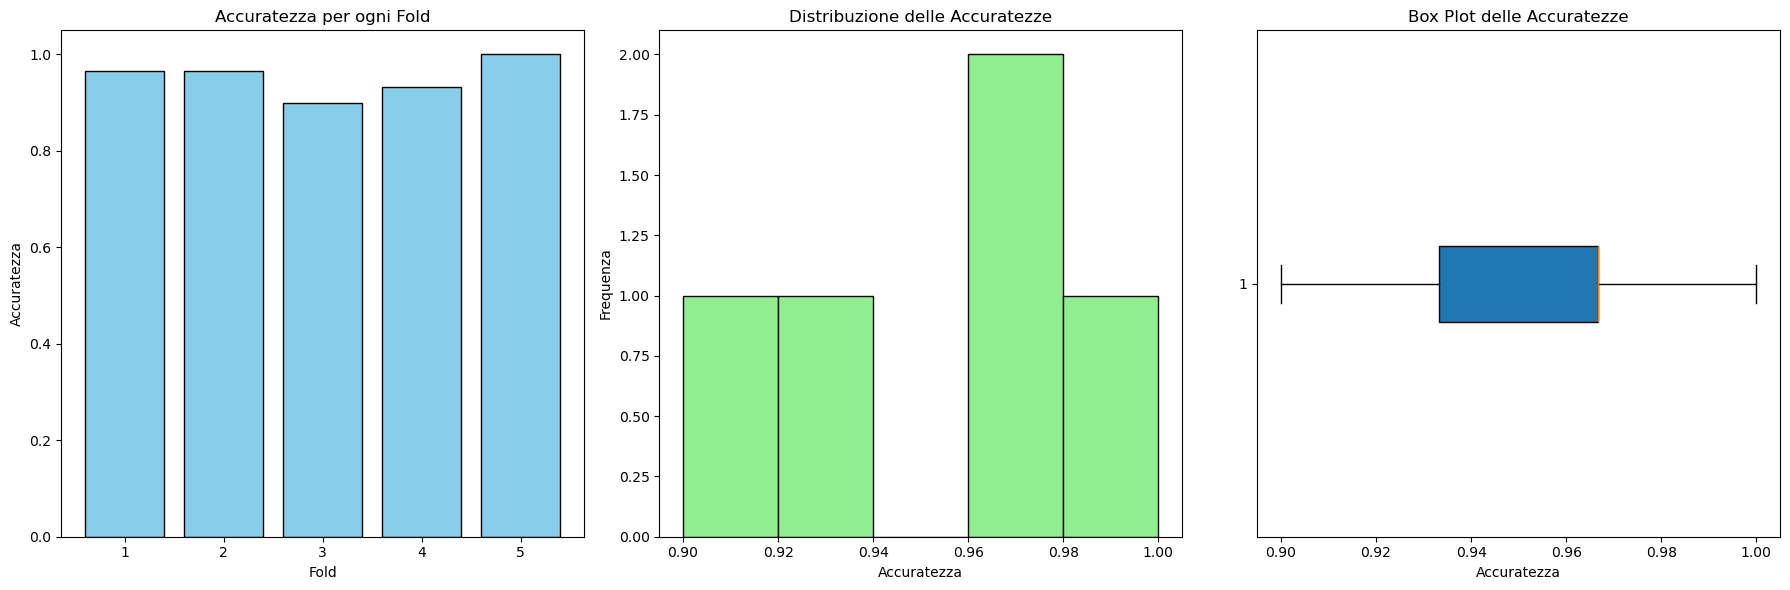

In [ ]:
# Crea i grafici
plt.figure(figsize=(18, 6))

# Grafico a Barre delle Accuratezze per ogni Fold
plt.subplot(1, 3, 1)
plt.bar(range(1, len(scores) + 1), scores, color='skyblue', edgecolor='black')
plt.xlabel('Fold')
plt.ylabel('Accuratezza')
plt.title('Accuratezza per ogni Fold')

# Histogramma delle Accuratezze
plt.subplot(1, 3, 2)
plt.hist(scores, bins=5, color='lightgreen', edgecolor='black')
plt.xlabel('Accuratezza')
plt.ylabel('Frequenza')
plt.title('Distribuzione delle Accuratezze')

# Box Plot delle Accuratezze
plt.subplot(1, 3, 3)
plt.boxplot(scores, vert=False, patch_artist=True)
plt.xlabel('Accuratezza')
plt.title('Box Plot delle Accuratezze')

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Carica il dataset Iris
data = load_iris()
X = data.data
y = data.target

# Crea un classificatore K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=3)

# Esegui la Cross-Validation
# Utilizziamo 5 fold per la cross-validation
scores = cross_val_score(knn, X, y, cv=5)

# Mostra i risultati
print("Accuratezza per ogni fold:", scores)
print("Accuratezza media:", np.mean(scores))
print("Deviazione standard dell'accuratezza:", np.std(scores))

Accuratezza per ogni fold: [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
Accuratezza media: 0.9666666666666668
Deviazione standard dell'accuratezza: 0.02108185106778919
